<a href="https://colab.research.google.com/github/RK22000/3Misionaries3Cannibals/blob/main/Step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting and displaying the entropy of files

Make method to get/display entropy of a file

In [1]:
import math
# Function to get entropy of a list of bytes
def entropy(block: bytes, n: int) -> float:
    byte_map: dict[int, int] = {}
    for byte in block:
        byte_map[byte] = byte_map.setdefault(byte, 0) + 1
    probs = map(lambda x: float(x)/n, byte_map.values())
    entropies = map(lambda p: -p*math.log2(p), probs)
    return sum(entropies)

In [22]:
entropy(block=bytes([1, 1, 1, 1, 2, 2, 3, 4]), n=8), entropy(block=bytes([1, 2, 3, 4]), n=4), entropy(block=bytes([1, 2]), n=2)

(1.75, 2.0, 1.0)

In [67]:
# Little experiment
entropy(block=bytes([1,1,1,1,1]), n=5), entropy(block=bytes([1,1,1,1,2]), n=5)

(0.0, 0.7219280948873623)

In [69]:
entropy(block=bytes([1,1,1,1,2,1]), n=6), entropy(block=bytes([1,1,1,1,2,2]), n=6), entropy(block=bytes([1,1,1,1,2,3]), n=6)
# adding in the more likely element reduces entropy

(0.6500224216483541, 0.9182958340544896, 1.2516291673878228)

In [7]:
import matplotlib.pyplot as plt
# Function to display entropy of a file given a specified window size
def file_entropy(file: str, window_size: int, label: str = "") -> None:
    entropies: list[float] = [0.0]
    with open(file=file, mode='rb') as f:
        while True:
            block = f.read(window_size)
            if block==bytes(): break
            #print(block)
            entropies.append(entropy(block=block, n=window_size))
            #print(entropies[-1])
    if label == "":
        label = f"window={window_size}" 
    plt.plot(range(len(entropies)), entropies, label=label)
    #print(entropies)

In [64]:
from typing import Tuple
def file_analyze(
    benign_file: str, 
    encrypted_file: str, 
    masked_file: str = "", 
    sizes = range(10, 40, 8), 
    plt_size: Tuple[int, int] = (8, 6)
    ) -> None:
    """---"""
    
    col = 2 if masked_file=="" else 3
    plt_size = (8, 6)
    plt.figure(figsize=(plt_size[0]*col, plt_size[1]))
    
    plt.subplot(1, col, 1)
    for size in sizes:
        file_entropy(file=benign_file, window_size=size)
    plt.legend()
    plt.title("Unencrypted Entropy")
    plt.subplot(1, col, 2)
    for size in sizes:
        file_entropy(file=encrypted_file, window_size=size)
    plt.legend()
    plt.title("Encrypted Entropy")

    if( col == 3 ):
        plt.subplot(1, col, 3)
        for size in sizes:
            file_entropy(file=masked_file, window_size=size)
        plt.legend()
        plt.title("Masked Entropy")

    plt.suptitle("Plots showing window sizes")




    plt.figure(figsize=(plt_size[0]*len(sizes), plt_size[1]))
    for i, size in enumerate(sizes):
        plt.subplot(1, len(sizes), i+1)
        file_entropy(file=benign_file, window_size=size, label="Unencrypted")
        file_entropy(file=encrypted_file, window_size=size, label="Encrypted")
        if(not masked_file==""):
            file_entropy(file=masked_file, window_size=size, label="Masked")
        plt.legend()
        plt.title(f"window size = {size}")
    plt.suptitle("Plots Comparing encrypted vs unencrypted window size")


In [61]:
sample_file = 'sample_data/README.md'
encrypted_file = 'sample_data/README.md.gpg'

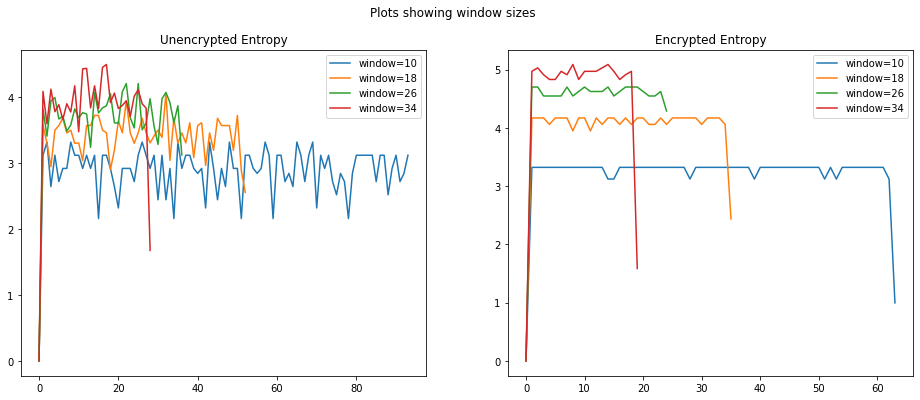

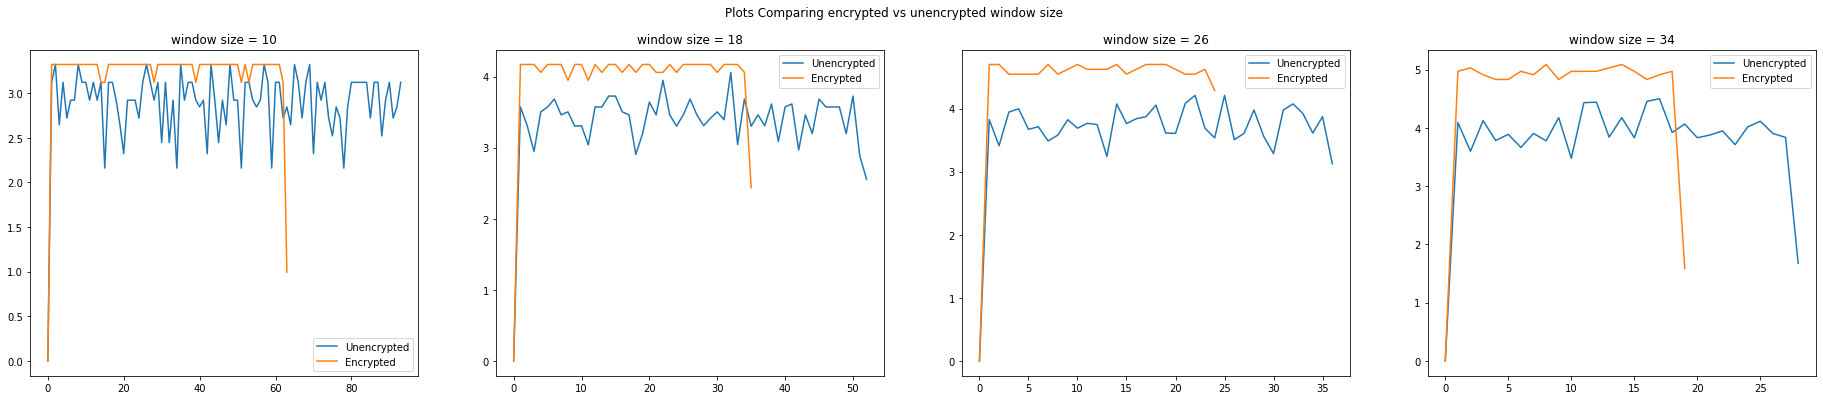

In [65]:
file_analyze(benign_file=sample_file, encrypted_file=encrypted_file)

# Applying Entropy Mask

## One gram Mask

In [32]:
from typing import Dict, List
from itertools import groupby
def one_gram_prob_dict(benign_files: List[str]) -> Dict[int, float]:
    probs: dict[int, float] = {}
    for file in benign_files:
        with open(file=file, mode='rb') as f:
            fbytes = f.read()
        for byte in fbytes:
            probs[byte] = probs.setdefault(byte, 0)+1
        for byte in probs:
            probs[byte] = float(probs[byte])/len(fbytes)
    return probs

In [47]:
one_gram = one_gram_prob_dict(benign_files=[sample_file])
pop_bytes = [(byte, one_gram[byte]) for byte in sorted(one_gram, key=lambda x: one_gram[x], reverse=True)]
B, P = zip(*pop_bytes)
for (b, p), b_, p_ in zip(pop_bytes, B, P):
    print(f"{bytes([b])}|{bytes([int(b_)])} -> {int(p*1000)/1000}|{int(p_*1000)/1000}")


b' '|b' ' -> 0.12|0.12
b'a'|b'a' -> 0.077|0.077
b's'|b's' -> 0.06|0.06
b'i'|b'i' -> 0.059|0.059
b'e'|b'e' -> 0.056|0.056
b't'|b't' -> 0.055|0.055
b'o'|b'o' -> 0.04|0.04
b'n'|b'n' -> 0.039|0.039
b'r'|b'r' -> 0.031|0.031
b'c'|b'c' -> 0.031|0.031
b'd'|b'd' -> 0.029|0.029
b'/'|b'/' -> 0.029|0.029
b'.'|b'.' -> 0.023|0.023
b'l'|b'l' -> 0.022|0.022
b'\n'|b'\n' -> 0.02|0.02
b'h'|b'h' -> 0.019|0.019
b'm'|b'm' -> 0.019|0.019
b'b'|b'b' -> 0.019|0.019
b'p'|b'p' -> 0.017|0.017
b'g'|b'g' -> 0.015|0.015
b'u'|b'u' -> 0.012|0.012
b'f'|b'f' -> 0.01|0.01
b'y'|b'y' -> 0.009|0.009
b'_'|b'_' -> 0.009|0.009
b'1'|b'1' -> 0.009|0.009
b'w'|b'w' -> 0.008|0.008
b'v'|b'v' -> 0.008|0.008
b':'|b':' -> 0.008|0.008
b'9'|b'9' -> 0.007|0.007
b'-'|b'-' -> 0.007|0.007
b'7'|b'7' -> 0.007|0.007
b'`'|b'`' -> 0.006|0.006
b'S'|b'S' -> 0.006|0.006
b'*'|b'*' -> 0.005|0.005
b'('|b'(' -> 0.005|0.005
b')'|b')' -> 0.005|0.005
b'A'|b'A' -> 0.005|0.005
b'2'|b'2' -> 0.005|0.005
b'3'|b'3' -> 0.005|0.005
b'8'|b'8' -> 0.005|0.005
b'T'|b'T

In [54]:
import random
from itertools import chain
def one_gram_mask(encrypted_file: str, probs: Dict[int, float]) -> None:
    with open(file=encrypted_file, mode='rb') as f:
        efbytes = f.read()
    b, p = zip(*[(k, probs[k]) for k in probs])
    masked_bytes = chain(*map(lambda x: (x, random.choices(population=b, weights=p, k=1)[0]), efbytes))
    with open(file=encrypted_file+".masked", mode='wb') as f:
        f.write(bytes(masked_bytes))

In [55]:
one_gram_mask(encrypted_file=encrypted_file, probs=one_gram)

In [56]:
masked_file = encrypted_file+".masked"

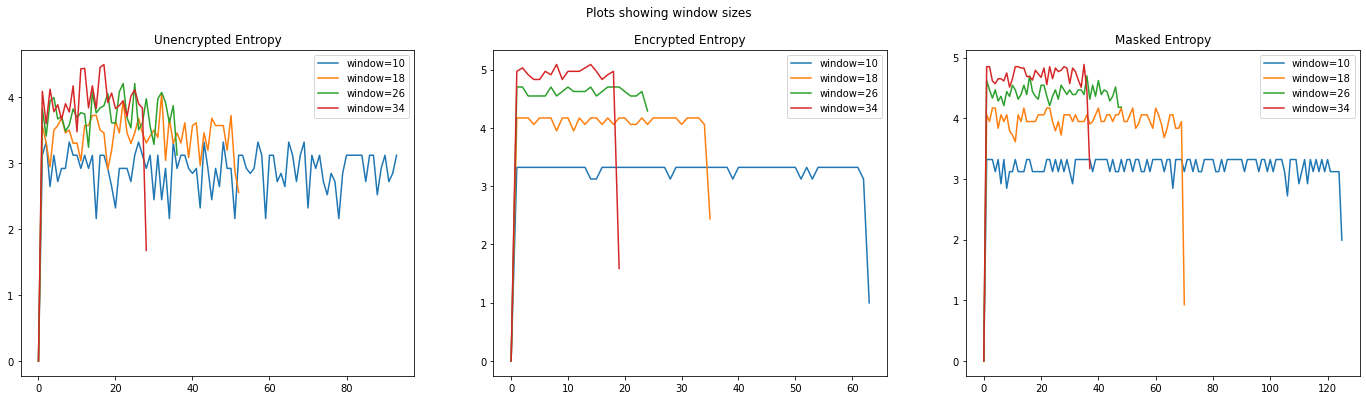

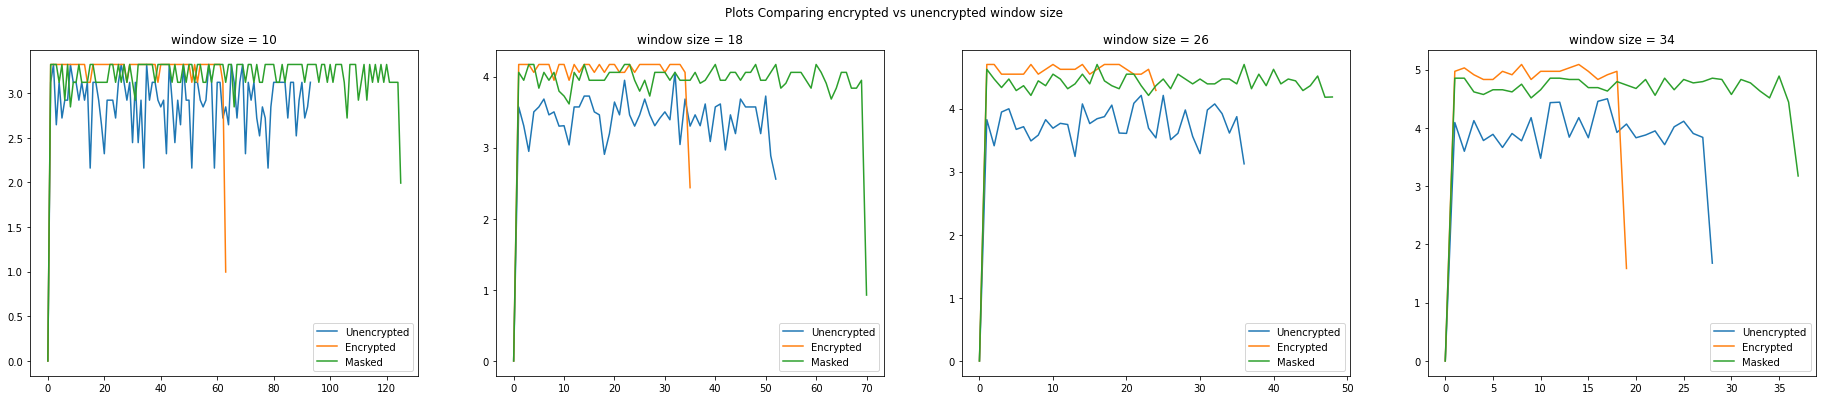

In [66]:
file_analyze(benign_file=sample_file, encrypted_file=encrypted_file, masked_file=masked_file)

## With a simple one gram mask the entropy has dropped very little and this has come at the cost of doubling the file size

## Future experiments
* 2 gram mask 2x padding
* 3 gram mask 2x padding
* 2 gram mask 1.5x padding
* 3 gram mask 1.5x padding
* spam the most common element as mask

## Two gram mask 2x padding

In [ ]:
def two_gram_probs()